## Imports

In [95]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

## Data Prep

In [96]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_for_psm_small.csv')

In [98]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [99]:
df.head()

personid                           encounterid  \
0  d9c8a41a-072d-4639-8391-4464368dcd7b  db503f7e-6b87-4ebd-860f-d40407eac716   
1  fa4e61d5-7dd8-428c-a4df-d7114d185c85  9b95589b-c5ec-49e6-84b0-88ead620eda8   
2  0432e975-98f9-497b-afdd-2281e340f11f  c073ab12-1266-48a6-80a3-fe0c0db27254   
3  2b88e67e-55d5-41bb-b151-8b216865339c  4f2fc87d-c1f9-4288-9b07-9e33e29837ab   
4  e7ad3126-c48d-43c1-a5be-e5bf0dea61f3  f8ff6396-48e6-4c3b-83db-c1d34951651b   

  condition  albumin_24_hours  ICU  CCI  qSOFA  hospital_free_days  \
0       D72                 0    0    1      0                   0   
1       D64                 0    0    0      0                   2   
2       D64                 0    0    2      0                   0   
3       D86                 0    0    1      0                   2   
4       D75                 0    0    7      1                   1   

   beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  albumin  LOS_days  
0             0                0                   0     0        0         0  
1             0                0                   0     0        0         0  
2             0                0                   0     0        0         2  
3             0                0                   0     0        0         0  
4             1                1                   0     1        0         2

In [101]:
df_a24 = df[['personid', 'encounterid', 'condition', 'albumin_24_hours', 'LOS_days', 'hospital_free_days']]

In [102]:
df_a24.head()

personid                           encounterid  \
0  d9c8a41a-072d-4639-8391-4464368dcd7b  db503f7e-6b87-4ebd-860f-d40407eac716   
1  fa4e61d5-7dd8-428c-a4df-d7114d185c85  9b95589b-c5ec-49e6-84b0-88ead620eda8   
2  0432e975-98f9-497b-afdd-2281e340f11f  c073ab12-1266-48a6-80a3-fe0c0db27254   
3  2b88e67e-55d5-41bb-b151-8b216865339c  4f2fc87d-c1f9-4288-9b07-9e33e29837ab   
4  e7ad3126-c48d-43c1-a5be-e5bf0dea61f3  f8ff6396-48e6-4c3b-83db-c1d34951651b   

  condition  albumin_24_hours  LOS_days  hospital_free_days  
0       D72                 0         0                   0  
1       D64                 0         0                   2  
2       D64                 0         2                   0  
3       D86                 0         0                   2  
4       D75                 0         2                   1

In [73]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [2]:
# df.shape

# 20000, 14
# 1308 Albumin
# 18692 Non Albumin

In [104]:
df.head()

personid                           encounterid  \
0  d9c8a41a-072d-4639-8391-4464368dcd7b  db503f7e-6b87-4ebd-860f-d40407eac716   
1  fa4e61d5-7dd8-428c-a4df-d7114d185c85  9b95589b-c5ec-49e6-84b0-88ead620eda8   
2  0432e975-98f9-497b-afdd-2281e340f11f  c073ab12-1266-48a6-80a3-fe0c0db27254   
3  2b88e67e-55d5-41bb-b151-8b216865339c  4f2fc87d-c1f9-4288-9b07-9e33e29837ab   
4  e7ad3126-c48d-43c1-a5be-e5bf0dea61f3  f8ff6396-48e6-4c3b-83db-c1d34951651b   

  condition  albumin_24_hours  ICU  CCI  qSOFA  hospital_free_days  \
0       D72                 0    0    1      0                   0   
1       D64                 0    0    0      0                   2   
2       D64                 0    0    2      0                   0   
3       D86                 0    0    1      0                   2   
4       D75                 0    0    7      1                   1   

   beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  albumin  LOS_days  
0             0                0                   0     0        0         0  
1             0                0                   0     0        0         0  
2             0                0                   0     0        0         2  
3             0                0                   0     0        0         0  
4             1                1                   0     1        0         2

## Initialize PsmPy Class

In [106]:
psm = PsmPy(df, treatment='albumin', indx='encounterid', exclude = ['personid', 'condition', 'albumin_24_hours', 'LOS_days', 'hospital_free_days'])

In [108]:
%%time
psm.logistic_ps(balance = True)

Wall time: 1min 54s


In [78]:
df_psm = psm.predicted_data

In [79]:
df_psm.head()

encounterid  ICU  CCI  qSOFA  beta_blocker  \
0  cb83e5a7-4550-4dad-a2b1-b169532904f5    1    6      1             0   
1  775149e3-a8ac-4cd0-9ab1-70f6751c4d20    0    6      1             1   
2  6eaade19-c98b-433e-845a-f1fa66b1ffb8    1    2      1             0   
3  0d46b907-ac1d-46ab-9091-8691da4b865f    0   12      0             0   
4  808f049c-cb6c-4538-b76b-494b955ca377    1    3      0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  propensity_score  \
0                0                   0     1          0.828931   
1                0                   0     0          0.803837   
2                0                   0     1          0.757771   
3                1                   0     0          0.784399   
4                0                   0     0          0.550615   

   propensity_logit  albumin  
0          1.578066        1  
1          1.410452        1  
2          1.140497        1  
3          1.291490        1  
4          0.203155        1

## Plot the propensity score / propensity logits

In [80]:
# sample larger non-albumin group first
# can adjust caliper 


psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


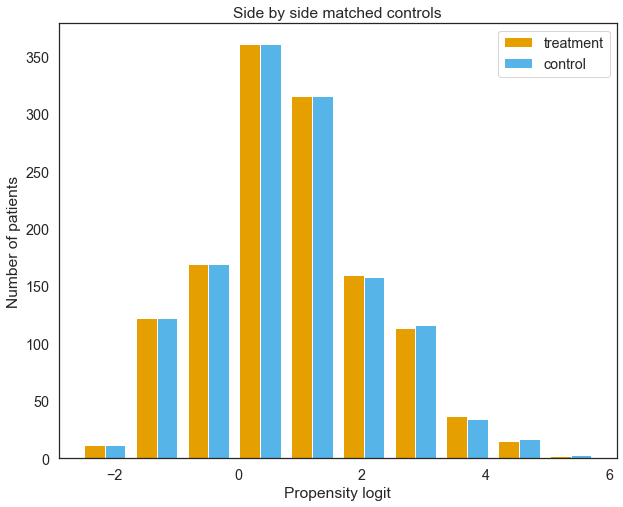

In [81]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

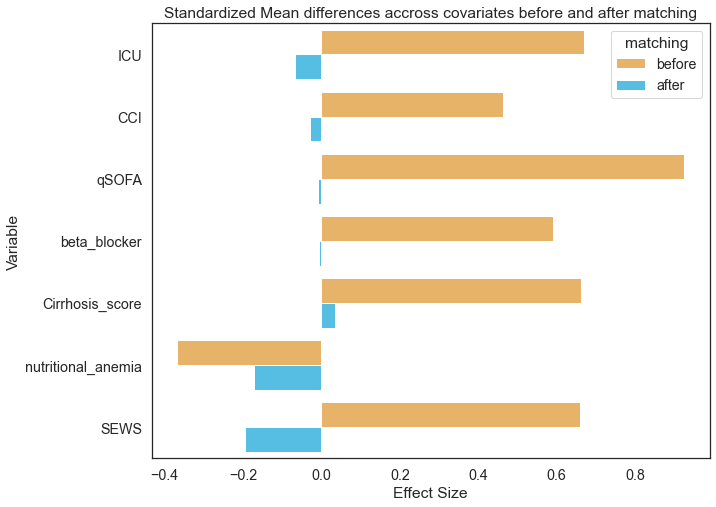

In [82]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [83]:
matched_df = psm.df_matched

In [84]:
matched_df.head()

encounterid  ICU  CCI  qSOFA  beta_blocker  \
0  cb83e5a7-4550-4dad-a2b1-b169532904f5    1    6      1             0   
1  775149e3-a8ac-4cd0-9ab1-70f6751c4d20    0    6      1             1   
2  6eaade19-c98b-433e-845a-f1fa66b1ffb8    1    2      1             0   
3  0d46b907-ac1d-46ab-9091-8691da4b865f    0   12      0             0   
4  808f049c-cb6c-4538-b76b-494b955ca377    1    3      0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  propensity_score  \
0                0                   0     1          0.828931   
1                0                   0     0          0.803837   
2                0                   0     1          0.757771   
3                1                   0     0          0.784399   
4                0                   0     0          0.550615   

   propensity_logit  albumin  
0          1.578066        1  
1          1.410452        1  
2          1.140497        1  
3          1.291490        1  
4          0.203155        1

In [85]:
matched_df.shape

(2616, 11)

## Matched Ids

In [86]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  cb83e5a7-4550-4dad-a2b1-b169532904f5  ad259255-20c3-4583-9603-1496fa711723
1  775149e3-a8ac-4cd0-9ab1-70f6751c4d20  f774b01f-6546-433e-99ac-ae051a5e528e
2  6eaade19-c98b-433e-845a-f1fa66b1ffb8  5c28af4f-f3d1-4cae-b9cd-be76d92c0870
3  0d46b907-ac1d-46ab-9091-8691da4b865f  d1437a2c-4560-495f-a0c9-c4d4d9398a2a
4  808f049c-cb6c-4538-b76b-494b955ca377  9b7166aa-5639-4598-b9cb-b7e4afc92040

## Effect sizes per variables

In [87]:
psm.effect_size

Variable matching  Effect Size
0                  ICU   before     0.670619
1                  ICU    after    -0.067101
2                  CCI   before     0.463662
3                  CCI    after    -0.028519
4                qSOFA   before     0.924905
5                qSOFA    after    -0.008338
6         beta_blocker   before     0.590595
7         beta_blocker    after    -0.006218
8      Cirrhosis_score   before     0.661326
9      Cirrhosis_score    after     0.035624
10  nutritional_anemia   before    -0.368273
11  nutritional_anemia    after    -0.171118
12                SEWS   before     0.658169
13                SEWS    after    -0.195542

## Explore Matched df

In [88]:
matched_df.head()

encounterid  ICU  CCI  qSOFA  beta_blocker  \
0  cb83e5a7-4550-4dad-a2b1-b169532904f5    1    6      1             0   
1  775149e3-a8ac-4cd0-9ab1-70f6751c4d20    0    6      1             1   
2  6eaade19-c98b-433e-845a-f1fa66b1ffb8    1    2      1             0   
3  0d46b907-ac1d-46ab-9091-8691da4b865f    0   12      0             0   
4  808f049c-cb6c-4538-b76b-494b955ca377    1    3      0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  propensity_score  \
0                0                   0     1          0.828931   
1                0                   0     0          0.803837   
2                0                   0     1          0.757771   
3                1                   0     0          0.784399   
4                0                   0     0          0.550615   

   propensity_logit  albumin  
0          1.578066        1  
1          1.410452        1  
2          1.140497        1  
3          1.291490        1  
4          0.203155        1

In [89]:
matched_df.albumin.value_counts()

1    1308
0    1308
Name: albumin, dtype: int64

In [90]:
matched_df.shape

(2616, 11)

## Join Matched df with earlier df on encounterid to add outcome variables

In [91]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [92]:
f_df.shape

(2616, 14)

In [93]:
f_df.head()

encounterid  ICU  CCI  qSOFA  beta_blocker  \
0  cb83e5a7-4550-4dad-a2b1-b169532904f5    1    6      1             0   
1  775149e3-a8ac-4cd0-9ab1-70f6751c4d20    0    6      1             1   
2  6eaade19-c98b-433e-845a-f1fa66b1ffb8    1    2      1             0   
3  0d46b907-ac1d-46ab-9091-8691da4b865f    0   12      0             0   
4  808f049c-cb6c-4538-b76b-494b955ca377    1    3      0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  propensity_score  \
0                0                   0     1          0.828931   
1                0                   0     0          0.803837   
2                0                   0     1          0.757771   
3                1                   0     0          0.784399   
4                0                   0     0          0.550615   

   propensity_logit  albumin  albumin_24_hours    LOS_hours  \
0          1.578066        1                 0   342.516667   
1          1.410452        1                 0   340.483333   
2          1.140497        1                 0  1619.733333   
3          1.291490        1                 1    38.050000   
4          0.203155        1                 1   415.933333   

   hospital_free_days  
0                 0.0  
1                75.0  
2                23.0  
3                 4.0  
4                72.0

In [94]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_matched_small.csv', index=False)